In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Read metrics.csv file
metrics = pd.read_csv('metrics.csv')
# Create a new column with the total time spent which is the sum of the time spent on each task
metrics['Total time spent (ms)'] = metrics['Computation Time (ms)'] + metrics['Communication Time (ms)'] + metrics['Synchronization Time (ms)']
metrics

,Number of Nodes,Computation Time (ms),Communication Time (ms),Synchronization Time (ms),Total time spent (ms)
0,1,12188,4025,5,16218
1,2,9256,4161,1,13418
2,3,7237,4504,1,11742
3,4,7007,4486,1,11494
4,5,6180,4811,1,10992
5,6,5988,5042,2,11032
6,7,6001,5283,2,11286
7,8,5155,5415,2,10572
8,9,5808,5729,4,11541
9,10,5402,6121,4,11527


In [22]:
metrics['Non-computation Ratio'] = (metrics['Communication Time (ms)'] + metrics['Synchronization Time (ms)']) / metrics['Computation Time (ms)']
metrics

,Number of Nodes,Computation Time (ms),Communication Time (ms),Synchronization Time (ms),Total time spent (ms),Non-computation Ratio
0,1,12188,4025,5,16218,0.330653
1,2,9256,4161,1,13418,0.449654
2,3,7237,4504,1,11742,0.622496
3,4,7007,4486,1,11494,0.640360
4,5,6180,4811,1,10992,0.778641
5,6,5988,5042,2,11032,0.842351
6,7,6001,5283,2,11286,0.880687
7,8,5155,5415,2,10572,1.050824
8,9,5808,5729,4,11541,0.987087
9,10,5402,6121,4,11527,1.133839


In [23]:
serial_total_time = metrics[metrics['Number of Nodes'] == 1]['Total time spent (ms)']
serial_total_time = serial_total_time.values[0]
# Calculate the speedup of the parallel version
metrics['speedup'] = (serial_total_time - metrics['Total time spent (ms)']) / metrics['Total time spent (ms)'] 
metrics

,Number of Nodes,Computation Time (ms),Communication Time (ms),Synchronization Time (ms),Total time spent (ms),Non-computation Ratio,speedup
0,1,12188,4025,5,16218,0.330653,0.000000
1,2,9256,4161,1,13418,0.449654,0.208675
2,3,7237,4504,1,11742,0.622496,0.381196
3,4,7007,4486,1,11494,0.640360,0.410997
4,5,6180,4811,1,10992,0.778641,0.475437
5,6,5988,5042,2,11032,0.842351,0.470087
6,7,6001,5283,2,11286,0.880687,0.437002
7,8,5155,5415,2,10572,1.050824,0.534052
8,9,5808,5729,4,11541,0.987087,0.405251
9,10,5402,6121,4,11527,1.133839,0.406958


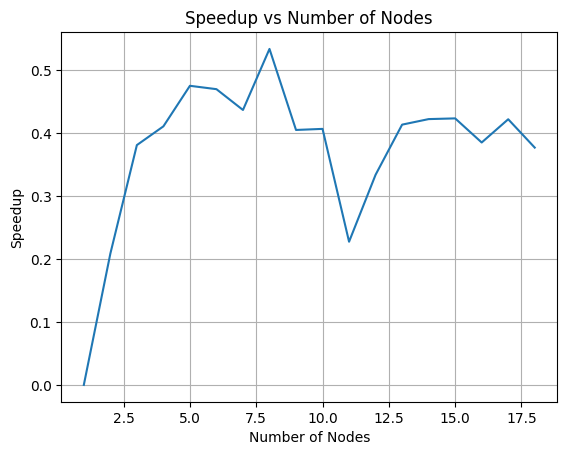

In [24]:
# Plot the speedup
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['speedup'])
plt.xlabel('Number of Nodes')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Nodes')
plt.grid()
plt.savefig('figures/speedup.png')
plt.show()


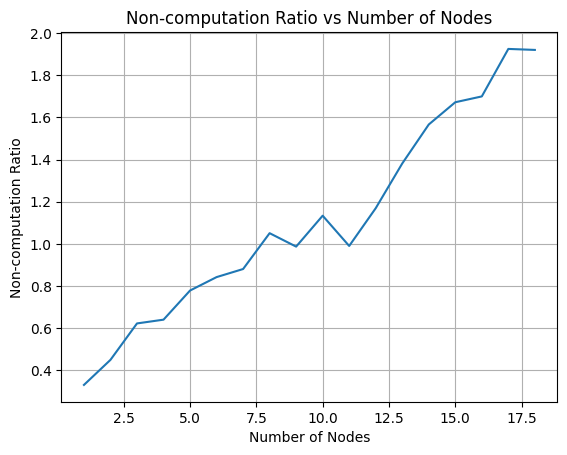

In [25]:
# Plot the non-computation ratio
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['Non-computation Ratio'])
plt.xlabel('Number of Nodes')
plt.ylabel('Non-computation Ratio')
plt.title('Non-computation Ratio vs Number of Nodes')
plt.grid()
plt.savefig('figures/non_computation_ratio.png')
plt.show()


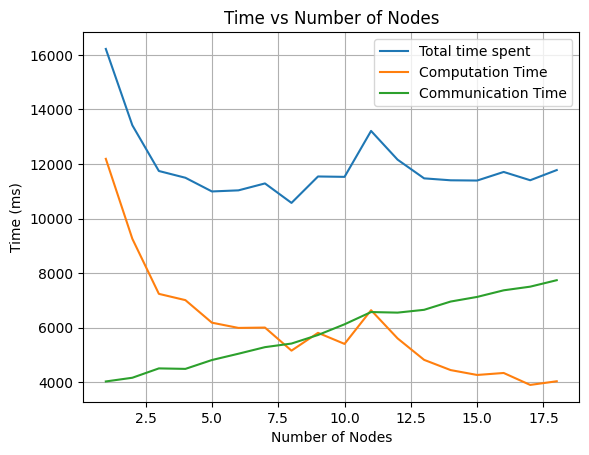

In [27]:
# Plot the total time spent, computation time and communication time
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['Total time spent (ms)'], label='Total time spent')
plt.plot(metrics['Number of Nodes'], metrics['Computation Time (ms)'], label='Computation Time')
plt.plot(metrics['Number of Nodes'], metrics['Communication Time (ms)'], label='Communication Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (ms)')
plt.title('Time vs Number of Nodes')
plt.legend()
plt.grid()
plt.savefig('figures/time.png')
plt.show()

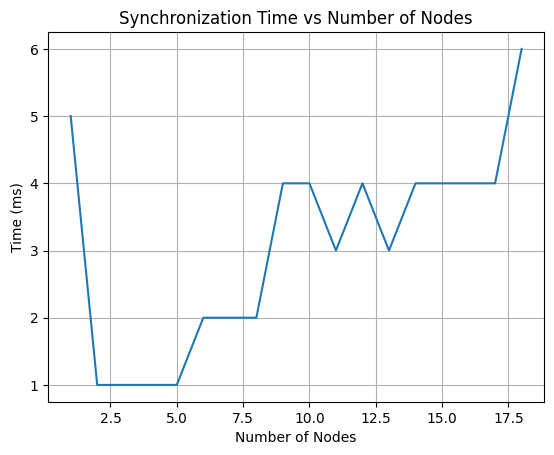

In [28]:
# Plot the synchronization time
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['Synchronization Time (ms)'])
plt.xlabel('Number of Nodes')
plt.ylabel('Time (ms)')
plt.title('Synchronization Time vs Number of Nodes')
plt.grid()
plt.savefig('figures/sync_time.png')
plt.show()